## Cosine Similarity Calculations
* Notebook completed by Adam Lang, Springboard Data Science Fellow
* Date: 5/1/2024

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [3]:
# install sklearn
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.6 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 17.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 26.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.6 MB 27.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.7/10.6 MB 30.8 MB/s eta 0:00:01
   ------------------------------------ --- 9.7/10.6 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 38.4 MB/s eta 0:00:00


In [66]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [5]:
df = pd.read_csv("distance_dataset (1).csv")

# head of the dataset
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


In [7]:
## 1. EDA
# check the shape of the data
df.shape

(2000, 5)

In [8]:
# check the data types
df.dtypes

Unnamed: 0      int64
X             float64
Y             float64
Z             float64
ClusterID       int64
dtype: object

In [9]:
# columns
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'Z', 'ClusterID'], dtype='object')

In [59]:
# lets look at summary statistics
df.describe()

,Unnamed: 0,X,Y,Z,ClusterID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,5.002561,5.032657,5.017639,3.000000
std,577.494589,1.935367,1.956047,1.957894,1.414567
min,0.000000,1.170533,1.350509,1.015867,1.000000
25%,499.750000,4.544975,3.704038,3.790899,2.000000
50%,999.500000,4.998504,5.081169,5.015852,3.000000
75%,1499.250000,5.457089,6.348823,6.345780,4.000000
max,1999.000000,8.983353,8.343726,8.600705,5.000000


Summary of exploratory data analysis so far:
* We can see that for columns X, Y, and Z, that based on the quartiles as well as the standard deviation, mean, min and max, there really isn't much difference in the values within the 3 columns. I guarantee that if we were to plot a histogram of this data we would see a lot of overlap of the data.

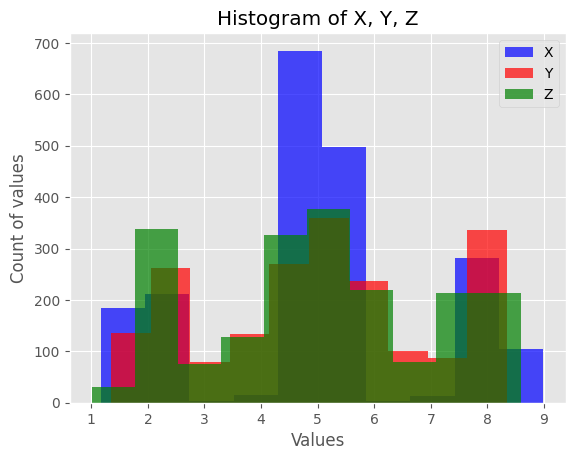

In [68]:
# histogram plot of the 3 columns
plt.hist(df['X'], bins=10, color='blue', alpha=0.7)
plt.hist(df['Y'], bins=10, color='red', alpha=0.7)
plt.hist(df['Z'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of X, Y, Z')
plt.xlabel('Values')
plt.ylabel('Count of values')
plt.legend(['X', 'Y', 'Z'],loc='upper right')
plt.show()

Summary:
* We can see with a histogram there is a **multimodal distribution** of the data with 3 peaks with 'X' having the most values between 4 and 6.

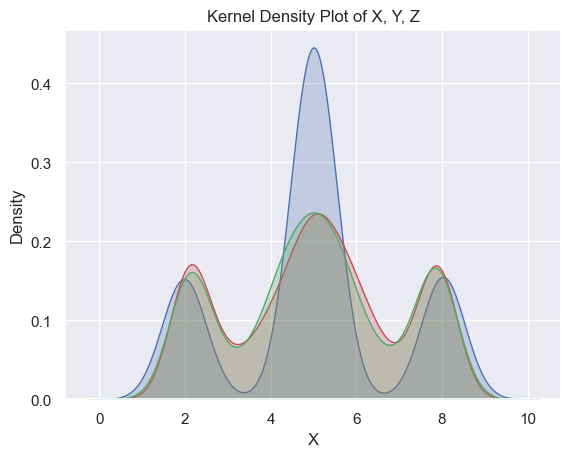

In [69]:
# lets see a kernel density plot of this just for further analysis
sns.set_theme(style="darkgrid")
sns.kdeplot(df['X'], fill=True, color="b")
sns.kdeplot(df['Y'], fill=True, color="r")
sns.kdeplot(df['Z'], fill=True, color="g")
plt.title('Kernel Density Plot of X, Y, Z')
plt.show()

The KDE plot gives us a clearer picture of what the histogram showed us, the multimodal distribution with 3 peaks, the most significant being the X column values between 4 and 6. I do think that the cosine similarity would be quite high for the values between 4 and 6 as a result due to there being significantly more values. Certainly if this was text data and we were performing TF-IDF, this would skew our document frequencies but obviously these are floats not text.

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [19]:
## create 2D matrix with Y and Z columns
two_d_matrix = df[['Y', 'Z']].values

# print the shape of the matrix
two_d_matrix.shape

(2000, 2)

In [22]:
print(two_d_matrix)

[[4.16754224 5.7876354 ]
 [5.77090875 6.0910442 ]
 [7.54043595 3.2472394 ]
 ...
 [2.35191142 6.77931097]
 [5.64267723 4.85577967]
 [5.27055029 7.84476766]]


In [23]:
# view first column of matrix
two_d_matrix[:, 0]

array([4.16754224, 5.77090875, 7.54043595, ..., 2.35191142, 5.64267723,
       5.27055029])

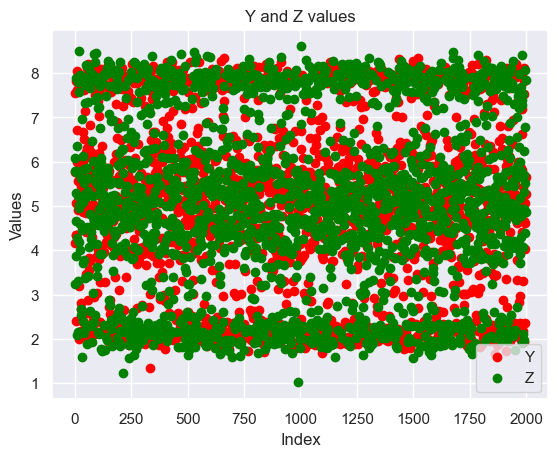

In [70]:
# Plot 'Y' values
plt.scatter(range(len(two_d_matrix)), two_d_matrix[:, 0], color='red', label='Y')

# Plot 'Z' values
plt.scatter(range(len(two_d_matrix)), two_d_matrix[:, 1], color='green', label='Z')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Y and Z values')
plt.legend()
plt.show()

Summary of above: We can see the comparison of Y and Z. A scatterplot is not a great medium to observe the data because of the significant similarity of the values they all overlap. But perhaps we can predict from this that the cosine similarity of the values of Y and Z will be very similar as a result.

In [29]:
# create 3D matrix with X, Y and Z columns
three_d_matrix = df[['X', 'Y', 'Z']].values

# print the shape of the matrix
three_d_matrix.shape

(2000, 3)

In [30]:
# print 3D matrix values
print(three_d_matrix)

[[5.13577939 4.16754224 5.7876354 ]
 [4.2807207  5.77090875 6.0910442 ]
 [8.3290979  7.54043595 3.2472394 ]
 ...
 [2.00018573 2.35191142 6.77931097]
 [4.73591658 5.64267723 4.85577967]
 [4.955436   5.27055029 7.84476766]]


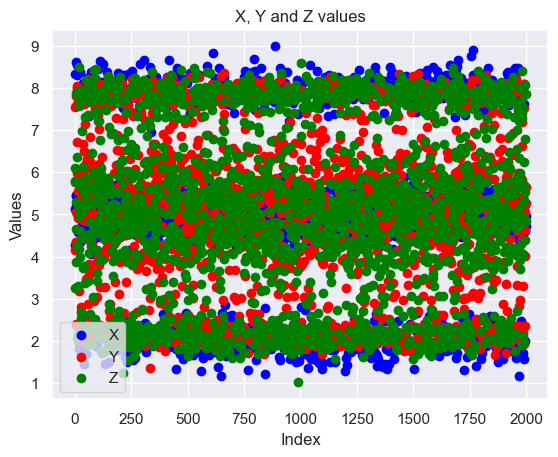

In [71]:
# Plot 'X' values
plt.scatter(range(len(three_d_matrix)), three_d_matrix[:, 0], color='blue', label='X')

# Plot 'Y' values
plt.scatter(range(len(two_d_matrix)), two_d_matrix[:, 0], color='red', label='Y')

# Plot 'Z' values
plt.scatter(range(len(two_d_matrix)), two_d_matrix[:, 1], color='green', label='Z')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('X, Y and Z values')
plt.legend()
plt.show()

Summary of above: Similar to the scatter plot of Y and Z, we can see again not much differences between the 3 values. Again, a scatterplot is not the greatest medium to demonstrate this, but it again shows us that the significant overlap in the points would suggest the cosine similarity of the 3 column of values may be similar.

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [33]:
simCosine3D = 1. - cosine_similarity(three_d_matrix, [[5,5,5]])
simCosine = 1. - cosine_similarity(two_d_matrix, [[5,5]])

In [39]:
# Let's see what the average cosine similarity is for each matrix
print(f"The average Cosine Similarity for the 3D matrix is {np.mean(simCosine3D):.4f}")

print(f"The average Cosine Similarity for the 2D matrix is {np.mean(simCosine):.4f}")

The average Cosine Similarity for the 3D matrix is 0.0406
The average Cosine Similarity for the 2D matrix is 0.0408


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

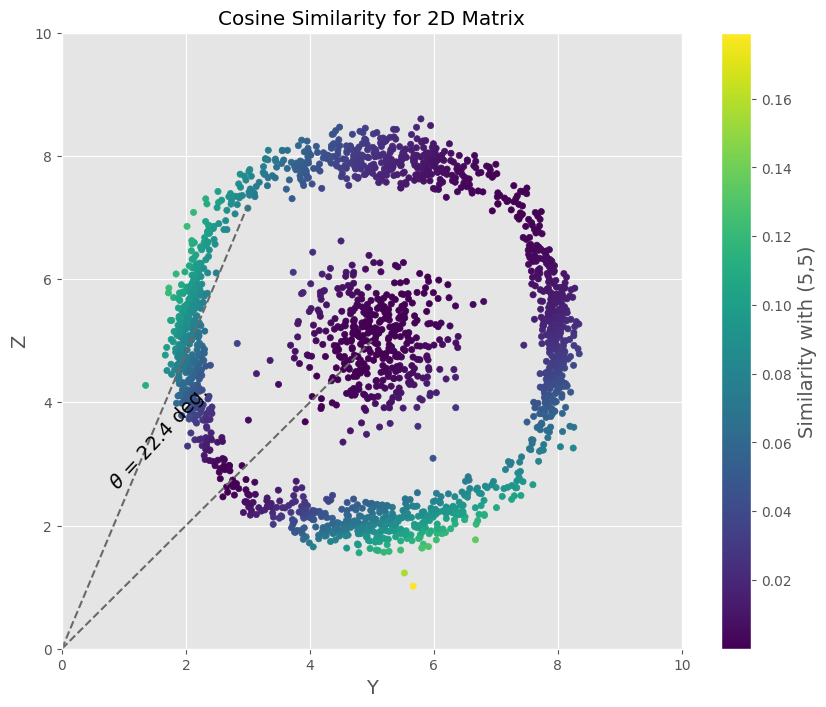

In [43]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(two_d_matrix[:,0], two_d_matrix[:,1], c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity for 2D Matrix')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

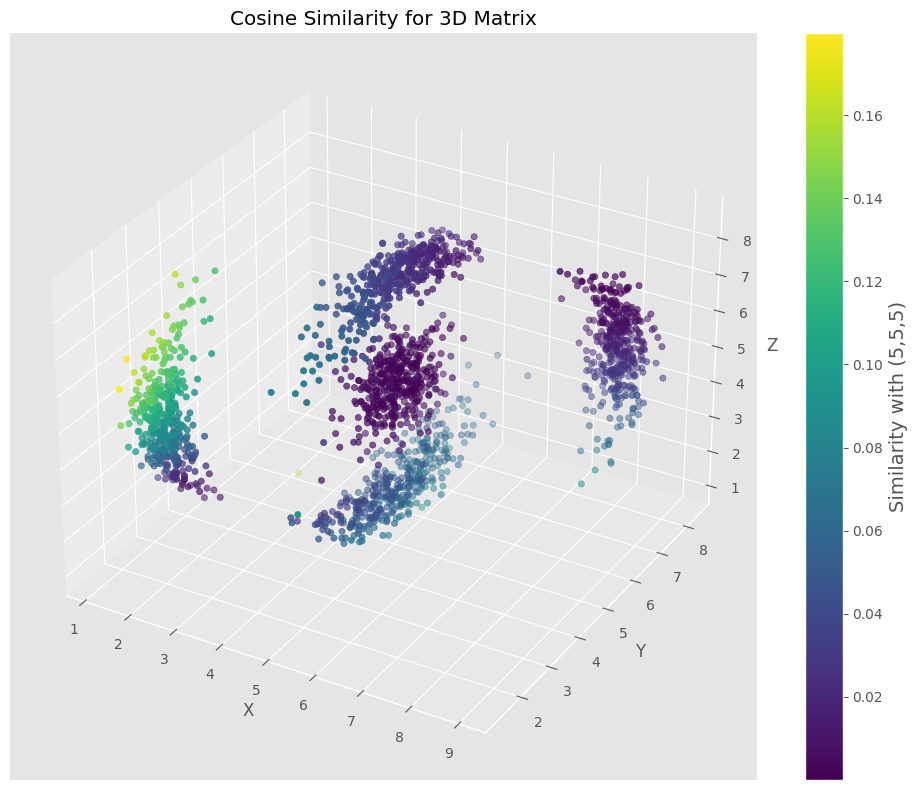

In [44]:
# imports
from mpl_toolkits.mplot3d import Axes3D

figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(three_d_matrix[:,0], three_d_matrix[:,1], three_d_matrix[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cosine Similarity for 3D Matrix')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)

figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [47]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer()
count_vect = CountVectorizer()

# create 2 documents
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

# create a corpus
corpus = [Document1,Document2]

# fit the vectorizer to the data
X_train_counts = count_vect.fit_transform(corpus)

# create dataframe
cnt_vect_df = pd.DataFrame(X_train_counts.toarray(),
                           columns=count_vect.get_feature_names_out(),index=['Document 1','Document 2'])

# print dataframe
print(cnt_vect_df)

            coffee  essence  of  starbucks
Document 1       1        0   0          1
Document 2       1        1   1          0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [49]:
# import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data
trsfm=vectorizer.fit_transform(corpus)

# create dataframe
trsfm_df = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

# print dataframe
print(trsfm_df)

              coffee   essence        of  starbucks
Document 0  0.579739  0.000000  0.000000   0.814802
Document 1  0.449436  0.631667  0.631667   0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [50]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [52]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer()
count_vect_new = CountVectorizer()

## create 2 new documents
new_doc1 = "I watched Apple TV at home."
new_doc2 = "I ate an apple watching TV at home."

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [54]:
# create a corpus
new_corpus = [new_doc1,new_doc2]

# fit the vectorizer to the data
X_train_count_new = count_vect_new.fit_transform(new_corpus)


          an  apple  at  ate  home  tv  watched  watching
new_doc1   0      1   1    0     1   1        1         0
new_doc2   1      1   1    1     1   1        0         1


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [55]:
# create dataframe
cnt_vect_df_new = pd.DataFrame(X_train_count_new.toarray(),
                           columns=count_vect_new.get_feature_names_out(),index=['new_doc1','new_doc2'])

# print dataframe
print(cnt_vect_df_new)

          an  apple  at  ate  home  tv  watched  watching
new_doc1   0      1   1    0     1   1        1         0
new_doc2   1      1   1    1     1   1        0         1


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [57]:
# import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate TfidfVectorizer
vectorizer_new = TfidfVectorizer()

# fit the vectorizer to the data
trsfm_new =vectorizer_new.fit_transform(new_corpus)

# create dataframe
trsfm_df_new = pd.DataFrame(trsfm_new.toarray(),columns=vectorizer_new.get_feature_names_out(),index=['new_doc1','new_doc2'])

# print dataframe
print(trsfm_df_new)

                an     apple        at       ate      home        tv   
new_doc1  0.000000  0.409090  0.409090  0.000000  0.409090  0.409090  \
new_doc2  0.446101  0.317404  0.317404  0.446101  0.317404  0.317404   

           watched  watching  
new_doc1  0.574962  0.000000  
new_doc2  0.000000  0.446101  


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [58]:
cosine_similarity(trsfm_new[0:1], trsfm_new)

array([[1.        , 0.51938799]])

Summary: For the 2 new "documents" or sentences I used to test the cosine similarity, the first value is showing us that document 0 is 100% similar to document 0, and the 2nd value is showing us that for document 0 and document 1 the similarity measure is 0.519 or just over 50% similarity between the 2 documents.